In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.rcParams.update({
    'figure.facecolor': '#1e1e2e',
    'axes.facecolor':   '#2a2a3e',
    'axes.labelcolor':  'white',
    'xtick.color':      'white',
    'ytick.color':      'white',
    'text.color':       'white',
    'axes.spines.top':  False,
    'axes.spines.right':False,
})

In [2]:
df = pd.read_csv('../../../data/ds_jobs.csv')
df.head(3)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1


In [3]:
df.shape

(672, 15)

In [4]:
df.columns.tolist()

['index',
 'Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors']

In [5]:
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

==== > No nulls

#### Voir les colonnes catégorielles seulement (type object)

In [6]:
df.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


In [7]:
df.describe(include='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_14632\87514550.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='object')


,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
count,672,672,672,672,672,672,672,672,672,672,672,672
unique,172,30,489,432,207,229,9,13,58,23,14,108
top,Data Scientist,$75K-$131K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,Maxar Technologies\r\n3.5,"San Francisco, CA","New York, NY",51 to 200 employees,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1
freq,337,32,12,12,69,33,135,397,71,188,213,501


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    str    
 2   Salary Estimate    672 non-null    str    
 3   Job Description    672 non-null    str    
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    str    
 6   Location           672 non-null    str    
 7   Headquarters       672 non-null    str    
 8   Size               672 non-null    str    
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    str    
 11  Industry           672 non-null    str    
 12  Sector             672 non-null    str    
 13  Revenue            672 non-null    str    
 14  Competitors        672 non-null    str    
dtypes: float64(1), int64(2), str(12)
memory usage: 78.9 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

index                672
Job Title            172
Salary Estimate       30
Job Description      489
Rating                32
Company Name         432
Location             207
Headquarters         229
Size                   9
Founded              103
Type of ownership     13
Industry              58
Sector                23
Revenue               14
Competitors          108
dtype: int64

In [11]:
df.dtypes

index                  int64
Job Title                str
Salary Estimate          str
Job Description          str
Rating               float64
Company Name             str
Location                 str
Headquarters             str
Size                     str
Founded                int64
Type of ownership        str
Industry                 str
Sector                   str
Revenue                  str
Competitors              str
dtype: object

### Nombre de -1 (unknown) pour chaque colonnes 

In [12]:
sentinel_num = (df.select_dtypes(include='number') == -1).sum()
sentinel_str = df.select_dtypes(include='object').apply(lambda c: (c == '-1').sum())
hidden = sentinel_num.add(sentinel_str, fill_value=0).astype(int)
hidden = hidden[hidden > 0]
print(hidden)

print(f'\nTotal caché : {hidden.sum()} valeurs manquantes réelles !')

Competitors          501
Founded              118
Headquarters          31
Industry              71
Rating                50
Revenue               27
Sector                71
Size                  27
Type of ownership     27
dtype: int64

Total caché : 923 valeurs manquantes réelles !


C:\Users\hp\AppData\Local\Temp\ipykernel_14632\1993052436.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  sentinel_str = df.select_dtypes(include='object').apply(lambda c: (c == '-1').sum())


### Colonne `index` redondante

In [13]:
print('Valeurs de df["index"] :', df['index'].tolist()[:8], '...')
print('Valeurs de range(0,n)  :', list(range(8)), '...')
print()
identique = list(df['index']) == list(range(len(df)))
print(f'Identiques ? → {identique}  ✅ PROUVÉ : doublon exact')

Valeurs de df["index"] : [0, 1, 2, 3, 4, 5, 6, 7] ...
Valeurs de range(0,n)  : [0, 1, 2, 3, 4, 5, 6, 7] ...

Identiques ? → True  ✅ PROUVÉ : doublon exact


###  `Company Name` contient le rating caché après `\n`

In [14]:
print('Valeurs brutes (repr révèle le \\n) :')
for v in df['Company Name'].head(5):
    print(f'  {repr(v)}')

nb = df['Company Name'].str.contains('\n').sum()
print(f'\nNoms contenant \\n : {nb}/{len(df)} ({nb/len(df)*100:.1f}%)')

# Preuve : rating extrait == colonne Rating
rating_from_name = pd.to_numeric(df['Company Name'].str.split('\n').str[1], errors='coerce')
match = (rating_from_name == df['Rating']).sum()
print(f'Rating extrait du nom == colonne Rating : {match}/{len(df)} fois ← DUPLIQUÉ')

Valeurs brutes (repr révèle le \n) :
  'Healthfirst\r\n3.1'
  'ManTech\r\n4.2'
  'Analysis Group\r\n3.8'
  'INFICON\r\n3.5'
  'Affinity Solutions\r\n2.9'

Noms contenant \n : 622/672 (92.6%)
Rating extrait du nom == colonne Rating : 619/672 fois ← DUPLIQUÉ


C:\Users\hp\AppData\Local\Temp\ipykernel_14632\3121131250.py:13: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_14632\3121131250.py:13: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
) missing from font(s) DejaVu Sans Mono._14632\3121131250.py:13: UserWarning: Glyph 13 (
  plt.tight_layout()
c:\Users\hp\Desktop\HR-Pulse\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\Desktop\HR-Pulse\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from font(s) DejaVu Sans Mono.ite-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(byt

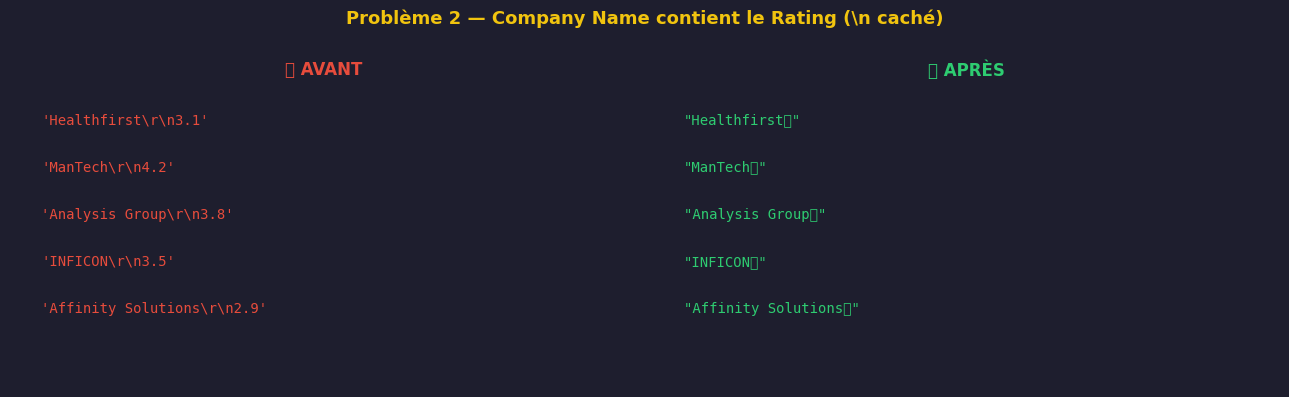

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
fig.suptitle('Problème 2 — Company Name contient le Rating (\\n caché)', color='#f1c40f', fontsize=13, fontweight='bold')
for ax in axes: ax.axis('off')

axes[0].text(0.5, 0.97, '❌ AVANT', transform=axes[0].transAxes, color='#e74c3c', fontsize=12, fontweight='bold', ha='center', va='top')
for i, v in enumerate(df['Company Name'].head(5)):
    axes[0].text(0.05, 0.78-i*0.14, repr(v), transform=axes[0].transAxes, color='#e74c3c', fontsize=10, family='monospace')

axes[1].text(0.5, 0.97, '✅ APRÈS', transform=axes[1].transAxes, color='#2ecc71', fontsize=12, fontweight='bold', ha='center', va='top')
for i, v in enumerate(df['Company Name'].str.split('\n').str[0].head(5)):
    axes[1].text(0.05, 0.78-i*0.14, f'"{v}"', transform=axes[1].transAxes, color='#2ecc71', fontsize=10, family='monospace')

plt.tight_layout()
plt.show()

### `Salary Estimate` : chaîne non numérique

In [16]:
print('Type :', df['Salary Estimate'].dtype)
print('Exemples :', df['Salary Estimate'].unique()[:5].tolist())

# Solution
def parse_salary(s):
    nums = re.findall(r'\d+', s)
    return (int(nums[0]) + int(nums[1])) / 2 if len(nums) >= 2 else np.nan

df['salary_avg_k'] = df['Salary Estimate'].apply(parse_salary)
print(f'\n Après parsing → min: {df["salary_avg_k"].min()} K$ | max: {df["salary_avg_k"].max()} K$ | moy: {df["salary_avg_k"].mean():.1f} K$')

Type : str
Exemples : ['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)', '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)', '$90K-$109K (Glassdoor est.)']

 Après parsing → min: 43.5 K$ | max: 271.5 K$ | moy: 123.7 K$


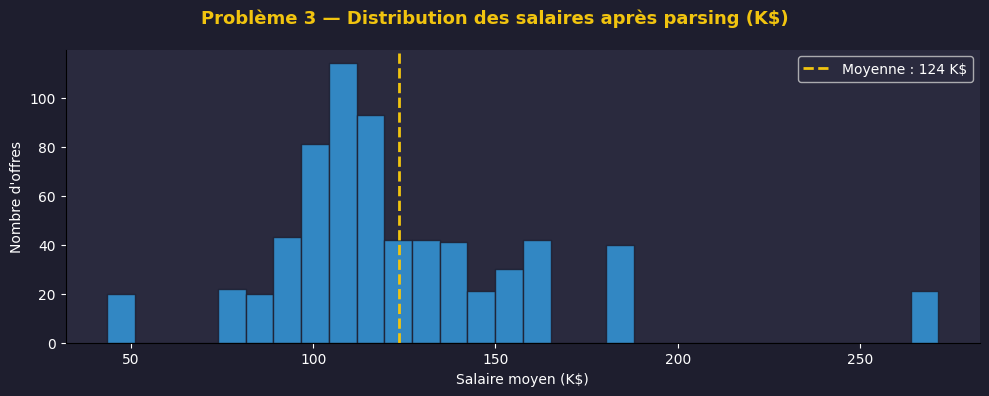

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Problème 3 — Distribution des salaires après parsing (K$)', color='#f1c40f', fontsize=13, fontweight='bold')
ax.hist(df['salary_avg_k'].dropna(), bins=30, color='#3498db', edgecolor='#1e1e2e', alpha=0.85)
ax.axvline(df['salary_avg_k'].mean(), color='#f1c40f', linestyle='--', linewidth=2, label=f'Moyenne : {df["salary_avg_k"].mean():.0f} K$')
ax.set_xlabel('Salaire moyen (K$)')
ax.set_ylabel('Nombre d\'offres')
ax.legend(facecolor='#2a2a3e', labelcolor='white')
plt.tight_layout()
plt.show()

### `Rating` : les `-1` faussent la moyenne

In [18]:
nb = (df['Rating'] == -1).sum()
mean_avec = df['Rating'].mean()
mean_sans = df.loc[df['Rating'] != -1, 'Rating'].mean()

print(f'Nombre de -1         : {nb}')
print(f'Moyenne AVEC les -1  : {mean_avec:.4f}  ← FAUSSE')
print(f'Moyenne SANS les -1  : {mean_sans:.4f}  ← RÉELLE')
print(f'Écart induit         : {abs(mean_avec - mean_sans):.4f} points')

Nombre de -1         : 50
Moyenne AVEC les -1  : 3.5186  ← FAUSSE
Moyenne SANS les -1  : 3.8818  ← RÉELLE
Écart induit         : 0.3632 points


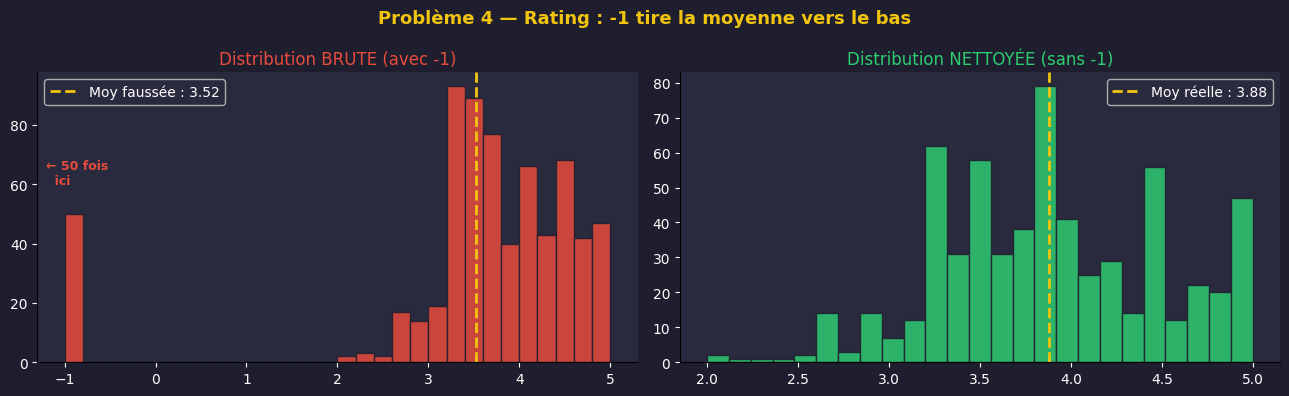

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
fig.suptitle('Problème 4 — Rating : -1 tire la moyenne vers le bas', color='#f1c40f', fontsize=13, fontweight='bold')

axes[0].hist(df['Rating'], bins=30, color='#e74c3c', edgecolor='#1e1e2e', alpha=0.85)
axes[0].axvline(mean_avec, color='#f1c40f', linestyle='--', linewidth=2, label=f'Moy faussée : {mean_avec:.2f}')
axes[0].set_title('Distribution BRUTE (avec -1)', color='#e74c3c')
axes[0].legend(facecolor='#2a2a3e', labelcolor='white')
axes[0].text(-1.2, 60, f'← {nb} fois\n  ici', color='#e74c3c', fontsize=9, fontweight='bold')

clean_r = df.loc[df['Rating'] != -1, 'Rating']
axes[1].hist(clean_r, bins=25, color='#2ecc71', edgecolor='#1e1e2e', alpha=0.85)
axes[1].axvline(mean_sans, color='#f1c40f', linestyle='--', linewidth=2, label=f'Moy réelle : {mean_sans:.2f}')
axes[1].set_title('Distribution NETTOYÉE (sans -1)', color='#2ecc71')
axes[1].legend(facecolor='#2a2a3e', labelcolor='white')

plt.tight_layout()
plt.show()

### `Founded` : `-1` aberrant + année brute peu exploitable

In [20]:
nb_f = (df['Founded'] == -1).sum()
print(f'Founded = -1 : {nb_f} fois ({nb_f/len(df)*100:.1f}%)')

# Aberration
age_aberrant = 2026 - (-1)
print(f'\n2024 - (-1) = {age_aberrant} ans ← ABERRANT ❌')

# Bonne façon
df['company_age'] = df['Founded'].replace(-1, np.nan).apply(lambda y: 2024 - y if pd.notna(y) else np.nan)
print(f'\ncompany_age → min: {df["company_age"].min():.0f} ans | max: {df["company_age"].max():.0f} ans | moy: {df["company_age"].mean():.0f} ans ✅')

corr = df[['company_age','salary_avg_k']].corr().iloc[0,1]
print(f'Corrélation company_age ↔ salary : {corr:.3f}')

Founded = -1 : 118 fois (17.6%)

2024 - (-1) = 2027 ans ← ABERRANT ❌

company_age → min: 5 ans | max: 243 ans | moy: 40 ans ✅
Corrélation company_age ↔ salary : 0.003


In [21]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,salary_avg_k,company_age
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154.0,31.0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,154.0,56.0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,154.0,43.0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154.0,24.0
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\r\n\r\nWe’re looking for a data scient...,3.6,TRANZACT\r\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,136.0,35.0
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\r\nBecome a thought leader wit...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,136.0,NaN
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,136.0,NaN
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\r\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,136.0,NaN


In [22]:
df["Founded"].max()

np.int64(2019)

### `Job Title` : 172 variantes pour ~5 postes réels

In [23]:
print(f'Titres uniques : {df["Job Title"].nunique()}')

print('\nVariantes de "Data Scientist" :')
variants = [t for t in df['Job Title'].unique() if 'data scientist' in t.lower()]
for v in variants[:12]:
    print(f'  "{v}"')
print(f'  ... ({len(variants)} variantes au total)')

Titres uniques : 172

Variantes de "Data Scientist" :
  "Sr Data Scientist"
  "Data Scientist"
  "Data Scientist / Machine Learning Expert"
  "Staff Data Scientist - Analytics"
  "Data Scientist - Statistics, Early Career"
  "Experienced Data Scientist"
  "Data Scientist - Contract"
  "Data Scientist/Machine Learning"
  "Data Scientist - Risk"
  "Data Scientist-Human Resources"
  "Senior Research Statistician- Data Scientist"
  "Associate Data Scientist"
  ... (57 variantes au total)


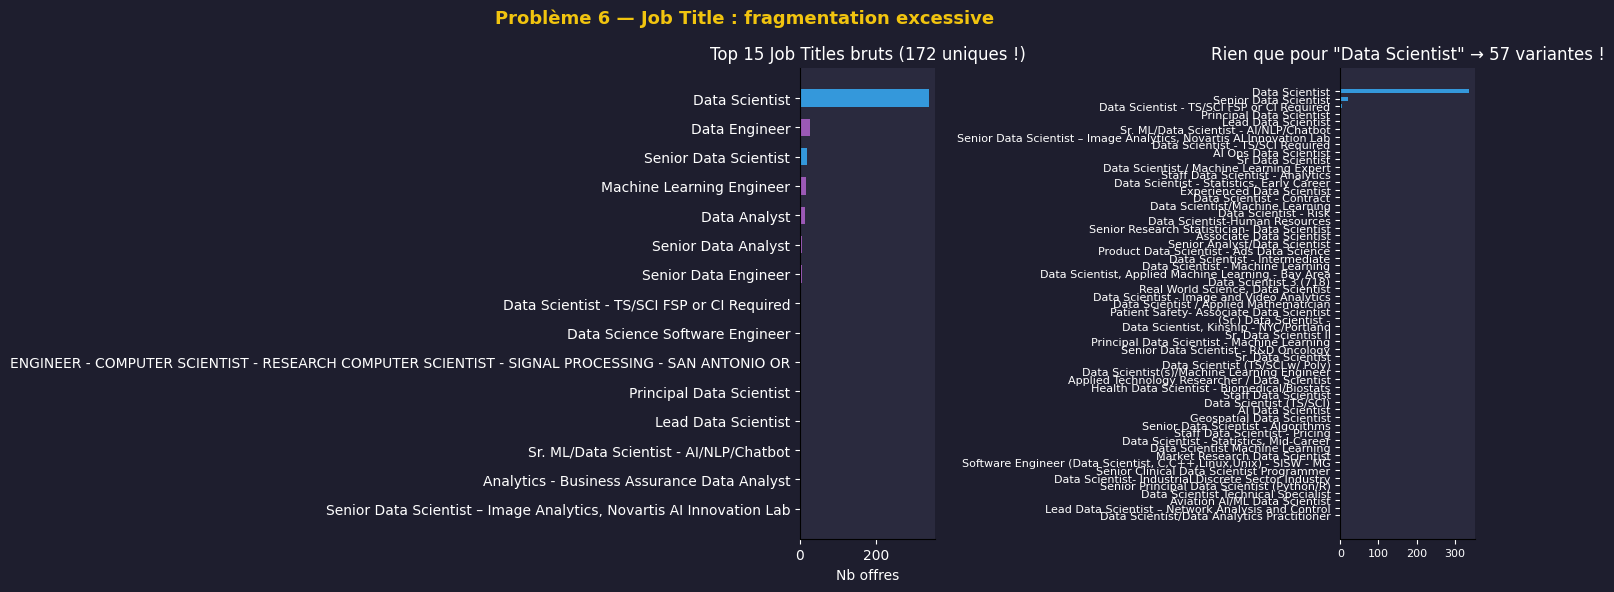

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Problème 6 — Job Title : fragmentation excessive', color='#f1c40f', fontsize=13, fontweight='bold')

top = df['Job Title'].value_counts().head(15)
colors = ['#3498db' if 'data scientist' in t.lower() else '#9b59b6' for t in top.index]
axes[0].barh(top.index[::-1], top.values[::-1], color=colors[::-1], height=0.6)
axes[0].set_title(f'Top 15 Job Titles bruts ({df["Job Title"].nunique()} uniques !)', color='white')
axes[0].set_xlabel('Nb offres')

ds_counts = df['Job Title'].value_counts()
ds_only = ds_counts[[t for t in ds_counts.index if 'data scientist' in t.lower()]]
axes[1].barh(ds_only.index[::-1], ds_only.values[::-1], color='#3498db', height=0.5)
axes[1].set_title(f'Rien que pour "Data Scientist" → {len(ds_only)} variantes !', color='white')
axes[1].tick_params(labelsize=8)

plt.tight_layout()
plt.show()

### `Size` : catégories texte non ordonnées

In [25]:
print('Valeurs brutes :')
for v in df['Size'].unique(): print(f'  "{v}"')

size_order = {
    '1 to 50 employees': 1, '51 to 200 employees': 2,
    '201 to 500 employees': 3, '501 to 1000 employees': 4,
    '1001 to 5000 employees': 5, '5001 to 10000 employees': 6,
    '10000+ employees': 7, '-1': np.nan, 'Unknown': np.nan
}
df['size_encoded'] = df['Size'].map(size_order)
corr_s = df[['size_encoded','salary_avg_k']].corr().iloc[0,1]
print(f'\nCorrélation size_encoded ↔ salary : {corr_s:.3f} → relation existante')

Valeurs brutes :
  "1001 to 5000 employees"
  "5001 to 10000 employees"
  "501 to 1000 employees"
  "51 to 200 employees"
  "10000+ employees"
  "201 to 500 employees"
  "1 to 50 employees"
  "-1"
  "Unknown"

Corrélation size_encoded ↔ salary : 0.002 → relation existante


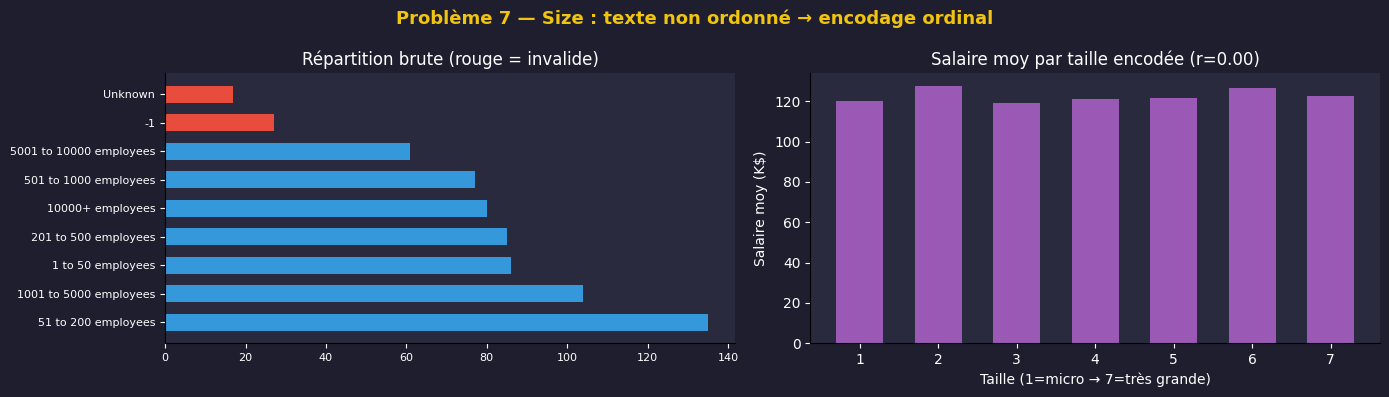

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Problème 7 — Size : texte non ordonné → encodage ordinal', color='#f1c40f', fontsize=13, fontweight='bold')

sc = df['Size'].value_counts()
axes[0].barh(sc.index, sc.values, color=['#e74c3c' if v in ['-1','Unknown'] else '#3498db' for v in sc.index], height=0.6)
axes[0].set_title('Répartition brute (rouge = invalide)', color='white')
axes[0].tick_params(labelsize=8)

sal_size = df[df['size_encoded'].notna()].groupby('size_encoded')['salary_avg_k'].mean()
axes[1].bar(sal_size.index, sal_size.values, color='#9b59b6', width=0.6)
axes[1].set_title(f'Salaire moy par taille encodée (r={corr_s:.2f})', color='white')
axes[1].set_xlabel('Taille (1=micro → 7=très grande)')
axes[1].set_ylabel('Salaire moy (K$)')

plt.tight_layout()
plt.show()

###  `Location` : ville et état mélangés

In [27]:
print(f'Locations uniques : {df["Location"].nunique()}')
print('Exemples :', df['Location'].unique()[:6].tolist())

df['state'] = df['Location'].str.split(',').str[-1].str.strip()
print(f'\nStates uniques : {df["state"].nunique()} ← beaucoup plus exploitable')

print('\nTop 8 états :')
print(df['state'].value_counts().head(8))

Locations uniques : 207
Exemples : ['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA', 'Santa Barbara, CA', 'Cambridge, MA']

States uniques : 44 ← beaucoup plus exploitable

Top 8 états :
state
CA    165
VA     89
MA     62
NY     52
MD     40
IL     30
DC     26
TX     17
Name: count, dtype: int64


### `Competitors` : 74.6% manquants → à exclure du ML

In [28]:
nb_c = (df['Competitors'] == '-1').sum()
pct  = nb_c / len(df) * 100
print(f'Valeurs -1 : {nb_c} ({pct:.1f}%)')
print(f'Valeurs réelles : {len(df)-nb_c} ({100-pct:.1f}%)')
print('\nExemples réels :')
for v in df.loc[df['Competitors'] != '-1', 'Competitors'].head(3):
    print(f'  "{v}"')

Valeurs -1 : 501 (74.6%)
Valeurs réelles : 171 (25.4%)

Exemples réels :
  "EmblemHealth, UnitedHealth Group, Aetna"
  "MKS Instruments, Pfeiffer Vacuum, Agilent Technologies"
  "Commerce Signals, Cardlytics, Yodlee"


###  `Job Description` : artefacts texte → NER pollué

In [29]:
n_sep = df['Job Description'].str.count(r'-{3,}').sum()
n_nl  = df['Job Description'].str.count(r'\n{2,}').sum()

print(f'Séquences "---" dans le dataset  : {n_sep}')
print(f'Doubles sauts de ligne            : {n_nl}')
print(f'Longueur moyenne (chars)          : {df["Job Description"].str.len().mean():.0f}')

print('\nDébut brut (repr) :')
print(repr(df['Job Description'].iloc[0][:250]))

Séquences "---" dans le dataset  : 25
Doubles sauts de ligne            : 0
Longueur moyenne (chars)          : 3521

Début brut (repr) :
'Description\r\n\r\nThe Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part o'
